In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [2]:
# get source data
source_directory = os.path.dirname("APD_salaries.ipynb")
source_table = source_directory + "ABQ_salaries.csv"

# read in the csv
salary_df = pd.read_csv(source_table)
salary_df = salary_df.sort_values(by="TOTAL EARNINGS")

# explore dataset
salary_df.head(5)

,NAME,DEPARTMENT,GRADE,JOB TITLE,TOTAL EARNINGS
249,"Martinez,Michael J",FD-Fire,FC2,Captain - 40 HR,110552.03
248,"Chacon,Xavier C",PD-Police,PF0,Sergeant,110648.21
247,"Casias,Lawrence J",PD-Police,PE2,Master Police Officer 1C,110680.44
246,"Groff,Matthew S",PD-Police,PE1,Senior Police Officer 1C,110805.70
245,"Correia,Donald R",PD-Police,PE1,Senior Police Officer 1C,111247.37


In [3]:
# generate a cop/not-cop list
cop_list = []

# loop through all the departments
for profession in list(salary_df["DEPARTMENT"]):
    
    # check if a cop
    if profession == "PD-Police":
        cop_list.append("blue")
    
    # otherwise just set it black
    else:
        cop_list.append("black")

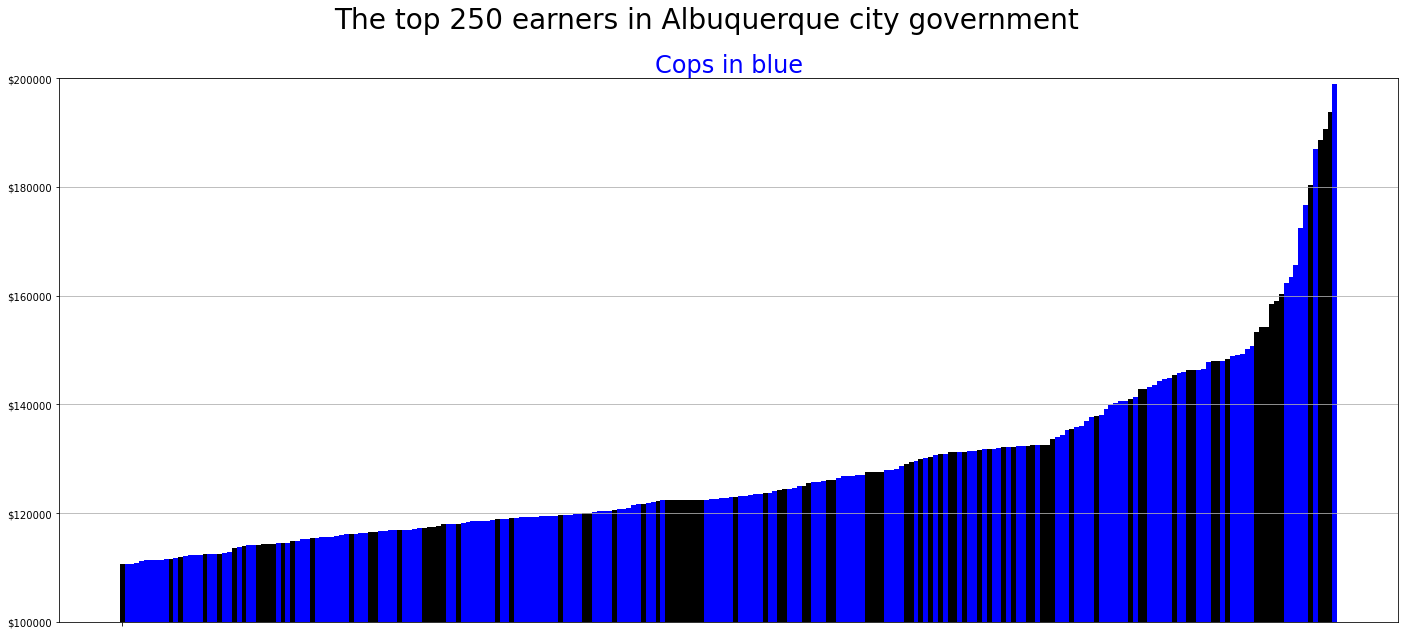

In [4]:
# create a dataset and set spacing
height = salary_df["TOTAL EARNINGS"]
bars = salary_df["NAME"]
x_pos = np.arange(len(bars))

# set up the figuire
fig, ax = plt.subplots(1, figsize=(24,10))

# create the bar plot
ax.bar(x_pos, height, color=cop_list, width=1.0)

# fix the x axis spacing and formats
ax.set_ylim(100000.0, 200000.0)
y_loc = plticker.MultipleLocator(base=10000.0)
y_format = plticker.FormatStrFormatter('$%.f')

# apply y axis tickers
ax.xaxis.set_major_locator(y_loc)
ax.yaxis.set_major_formatter(y_format)

# set the y axis size
ax.yaxis.label.set_size(80) 

# add the y axis grid
plt.grid(axis = 'y')

# set the titles
plt.suptitle("The top 250 earners in Albuquerque city government", fontsize=28)
plt.title("Cops in blue", color="blue", fontsize=24)

# hide the x axis
ax.set(xticklabels=[])

# save the figure
plt.savefig(source_directory + "barplot.png", dpi=300, facecolor="white")